# [MO443] Trabalho de Esteganografia - Trabalho 01

> Trabalho realizado por Maria Angélica Krüger Miranda {197698}
>
> **Objetivo:** Implementar um algoritmo de estenografia em imagens digitais

## Introdução

A esteganografia é uma técnica que visa esconder uma informação dentro de outro objeto a fim de evitar detecções. Por meio desta, é possível ocultar qualquer tipo de conteúdo digital, desde texto até imagens, vídeos e conteúdos de áudio. Diante disso, neste trabalho, será utilizada esta técnica para esconder um arquivo texto, que conterá a mensagem que será ocultada, dentro de uma imagem digital. Esta técnica difere da criptografia pois a esteganografia apenas oculta a existência da informação, não alterando o formato da mesma.

A abordagem que será adotada é incorporar as informações nos bits menos significativos da imagem, permitindo que as alterações produzidas nessa não sejam perceptíveis aos olhos humanos. As imagens digitais são compostas por diversos canais, e neste caso serão adotadas imagens do tipo RGB, ou seja, imagens que contém três canais, cada uma delas associadas as cores vermelha (Red), verde (Green) e azul (Blue), respectivamente. Além disso, cada canal possui um valor contido no intervalo [0,255], representado por 1 byte. Portanto, o presente trabalho realizará a codificação de um texto em uma imagem manipulando os bits menos significativos e também realizará o processo inverso, a decodificação.

## Procedimento

Para realizar todo o processo de esteganografia é preciso entender e discutir as diversas partes que o compõe. Elas serão discutidas de forma separadas para facilitar o entendimento da lógica envolvida. Os princioais componentes necessários são:

- Dada uma imagem é preciso separar os três canais RGB;
- A partir dos canais da imagem, acessar o plano de bits;
- Dado um texto, convertê-lo para a sua forma binária e
- Dado um vetor binário, convertê-lo para o formato de texto

### Manipulação da Imagem

O primeiro passo para manipular uma imagem é carregá-la ao programa e para isso será utilizado a função `imread()` da biblioteca **OpenCv**. Alguns cuidados devem ser tomados a partir daqui. O primeiro deles diz respeito a ordem de armazenamento dos canais em imagens coloridas, ao invés de seguir a ordem tradicional R G B, há uma inversão, ou seja, B G R. Para seguir a padronização e facilitar o entendimento foi feito a inversão da ordem das bandas por meio da função `cvtColor()`, esta função realiza a conversão da imagem de um espaço de cor para outro. O segundo cuidado diz respeito ao tamanho da imagem, segundo a biblioteca, por padrão, a quantidade de pixels que será carregada deverá ser menor que $2^{30}$, caso precise carregar imagens maiores poderá redefinir o limite usando a variável do sistema `OPENCV_IO_MAX_IMAGE_PIXELS`. O último cuidado diz respeito a apresentação da imagem. Como está sendo utilizado um **Notebook**, não será possível utilizar a função `imshow()` nativa da biblioteca **OpenCV**, sendo assim, no lugar desta função foi utilizada a função `show()` da biblioteca **Mathplotlib**.

O próximo procedimento que será muito utilizado neste trabalho consiste na separação das bandas RGB da imagem. Há uma função da própria biblioteca **OpenCV** que realiza este procedimento que é a `merge()`, em que separa a-uma imagem de multicanais em diversas imagens de um canal cada. Para visualizar a imagem em tons de cinza é preciso reconfigurar o `cmap` para o mapa de cores desejado, que no caso foi os níveis de cinza. Além da representação da imagem em níveis de cinza também foi utilizada a representação das bandas das imagens nas suas respectivas cores, por exemplo, o canal vermelho varia de $0$ a $255$ e estes valores foram associados tanto a tons de cinze quanto a tons avermelhados.

A seguir é mostrado os procedimentos mencionados acima, desde o carregamento da imagem, conversão para o sistema de cores RGB, separação dos canais de cor e visualização. Para isso foi utilizado a imagem de um mandril macho para que seja notado a diferença entre vermelho, azul e verde na hora que mostra cada imagem em seu respectivo canal de cor. As regiões onde o vermelho está presente, por exemplo, ao visualizar a banda vermelha, percebe-se que a coloração apresenta maior intensidade, ficando branca em tons de cinza e vermelho intenso em tons avermelhados. O mesmo vale para outras regiões coloridas e suas respectivas bandas. 


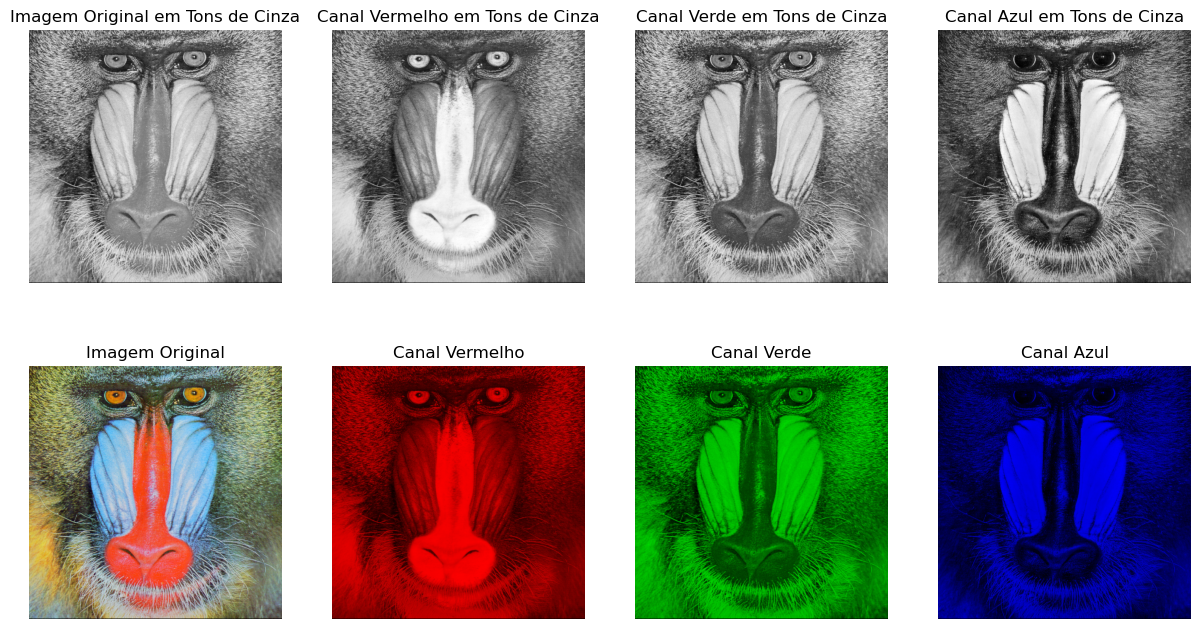

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem e mudar o formato para RGB
img = cv2.imread('baboon.png')
imagem = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separar os canais de cor da imagem em níveis de cinza
(canalVermelho, canalVerde, canalAzul) = cv2.split(imagem)

# Visualizar o canal de cor na sua respectiva cor
zeros = np.zeros(imagem.shape[:2], dtype = "uint8")
img_CanalVermelho = cv2.merge([canalVermelho,zeros, zeros])
img_CanalVerde = cv2.merge([zeros, canalVerde, zeros])
img_CanalAzul = cv2.merge([zeros, zeros, canalAzul])

# Mostras as imagens
fig, subimagem = plt.subplots(2, 4, figsize=(15, 8))
subimagem[0,0].imshow((cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)), cmap='gray')
subimagem[0,0].set_title("Imagem Original em Tons de Cinza")
subimagem[0,0].axis('off')
subimagem[0,1].imshow(canalVermelho, cmap='gray')
subimagem[0,1].set_title("Canal Vermelho em Tons de Cinza")
subimagem[0,1].axis('off')
subimagem[0,2].imshow(canalVerde, cmap='gray')
subimagem[0,2].set_title("Canal Verde em Tons de Cinza")
subimagem[0,2].axis('off')
subimagem[0,3].imshow(canalAzul, cmap='gray')
subimagem[0,3].set_title("Canal Azul em Tons de Cinza")
subimagem[0,3].axis('off')
subimagem[1,0].imshow(imagem)
subimagem[1,0].set_title("Imagem Original")
subimagem[1,0].axis('off')
subimagem[1,1].imshow(img_CanalVermelho)
subimagem[1,1].set_title("Canal Vermelho")
subimagem[1,1].axis('off')
subimagem[1,2].imshow(img_CanalVerde)
subimagem[1,2].set_title("Canal Verde")
subimagem[1,2].axis('off')
subimagem[1,3].imshow(img_CanalAzul)
subimagem[1,3].set_title("Canal Azul")
subimagem[1,3].axis('off')

plt.show()

Agora que a imagem está carregada no programa, foi realizada a segmentação de cada canal de cor em planos de bits. Sabe-se que cada banda da imagem carrega o valor da intensidade $i$ do pixel naquele plano, em que $i = \{i \in \Z | 0 \leq i \leq 255 \}$. Esse valor é representado por meio de um *byte*, ou seja, para o valor $i = 115$ teremos o binário $01110011$ associado. O acesso a um bit em específico é efetuado por meio dos operadores bitwise '\&' e '\gt \gt'. Primeiro é aplicado o operador AND no valor $i$ com a string binária de zeros com o valor $1$ encontra-se na posição do bit desejado, obtendo uma nova string binária com o bit desejado. Para o número $155$ e o desejo de acessar o segundo bit mais significativo, teremos $01110011  \&  01000000 \rarr 01000000$. Por fim, é preciso realizar um deslocamento do bit desejado para a posição menos significativa. Seguindo o exemplo anterior, arrastar o segundo bit mais significativo para o bit menos significativo, ou seja, $01000000 \gt \gt 6 \rarr 00000001$. 

Realizado este procedimento em cada pixel daquele canal de cor é possível construir uma nova imagem binária associada a um plano de bits. O trecho de código abaixo ilustra a obtenção dos oito plano de bits para cada banda, em seguida é representada a imagem binária resultante. É possível perceber a quantidade de informação que cada plano de bits carrega, sendo os bits mais significativos com mais informações e os menos significativas com menos informação. A partir disso é possível entender que para realizar o processo de esteganografia é interessante realizar o ocultamento da mensagem nos bits menos significativos (bits 0, 1 e 2) uma vez que não realizará alterações perceptíveis na imagem final.

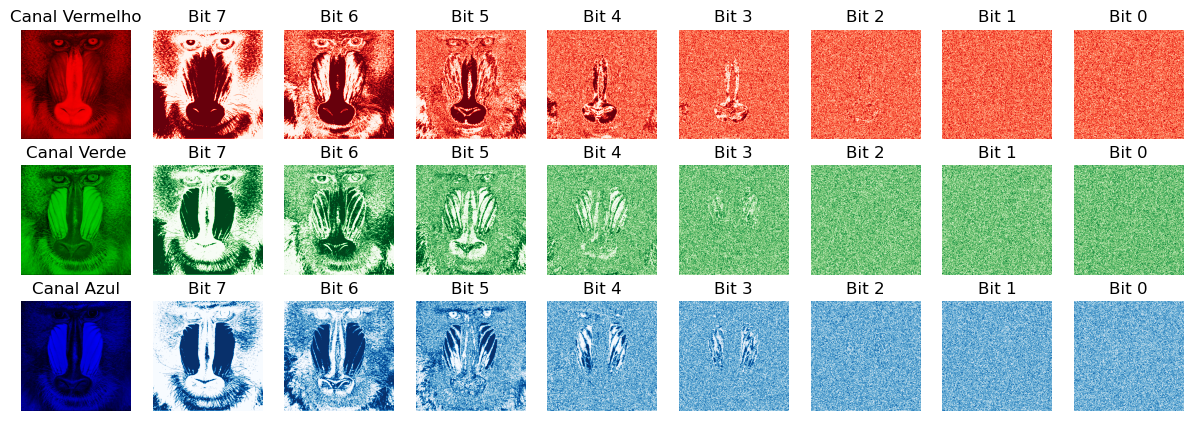

In [10]:
# Montar o plano de bits para o canal vermelho
bit7_canalVermelho = (canalVermelho & 0b10000000) >> 7
bit6_canalVermelho = (canalVermelho & 0b01000000) >> 6
bit5_canalVermelho = (canalVermelho & 0b00100000) >> 5
bit4_canalVermelho = (canalVermelho & 0b00010000) >> 4
bit3_canalVermelho = (canalVermelho & 0b00001000) >> 3
bit2_canalVermelho = (canalVermelho & 0b00000100) >> 2
bit1_canalVermelho = (canalVermelho & 0b00000010) >> 1
bit0_canalVermelho = (canalVermelho & 0b00000001) >> 0

# Montar o plano de bits para o canal verde
bit7_canalVerde = (canalVerde & 0b10000000) >> 7
bit6_canalVerde = (canalVerde & 0b01000000) >> 6
bit5_canalVerde = (canalVerde & 0b00100000) >> 5
bit4_canalVerde = (canalVerde & 0b00010000) >> 4
bit3_canalVerde = (canalVerde & 0b00001000) >> 3
bit2_canalVerde = (canalVerde & 0b00000100) >> 2
bit1_canalVerde = (canalVerde & 0b00000010) >> 1
bit0_canalVerde = (canalVerde & 0b00000001) >> 0

# Montar o plano de bits para o canal azul
bit7_canalAzul = (canalAzul & 0b10000000) >> 7
bit6_canalAzul = (canalAzul & 0b01000000) >> 6
bit5_canalAzul = (canalAzul & 0b00100000) >> 5
bit4_canalAzul = (canalAzul & 0b00010000) >> 4
bit3_canalAzul = (canalAzul & 0b00001000) >> 3
bit2_canalAzul = (canalAzul & 0b00000100) >> 2
bit1_canalAzul = (canalAzul & 0b00000010) >> 1
bit0_canalAzul = (canalAzul & 0b00000001) >> 0

# Plotagem dos planos de bitsd para cada canal
fig, subimagem = plt.subplots(3, 9, figsize=(15, 5))
subimagem[0,0].imshow(img_CanalVermelho)
subimagem[0,0].set_title("Canal Vermelho")
subimagem[0,0].axis('off')
subimagem[0,1].imshow(bit7_canalVermelho, cmap='Reds')
subimagem[0,1].set_title("Bit 7")
subimagem[0,1].axis('off')
subimagem[0,2].imshow(bit6_canalVermelho, cmap='Reds')
subimagem[0,2].set_title("Bit 6")
subimagem[0,2].axis('off')
subimagem[0,3].imshow(bit5_canalVermelho, cmap='Reds')
subimagem[0,3].set_title("Bit 5")
subimagem[0,3].axis('off')
subimagem[0,4].imshow(bit4_canalVermelho, cmap='Reds')
subimagem[0,4].set_title("Bit 4")
subimagem[0,4].axis('off')
subimagem[0,5].imshow(bit3_canalVermelho, cmap='Reds')
subimagem[0,5].set_title("Bit 3")
subimagem[0,5].axis('off')
subimagem[0,6].imshow(bit2_canalVermelho, cmap='Reds')
subimagem[0,6].set_title("Bit 2")
subimagem[0,6].axis('off')
subimagem[0,7].imshow(bit1_canalVermelho, cmap='Reds')
subimagem[0,7].set_title("Bit 1")
subimagem[0,7].axis('off')
subimagem[0,8].imshow(bit0_canalVermelho, cmap='Reds')
subimagem[0,8].set_title("Bit 0")
subimagem[0,8].axis('off')

subimagem[1,0].imshow(img_CanalVerde)
subimagem[1,0].set_title("Canal Verde")
subimagem[1,0].axis('off')
subimagem[1,1].imshow(bit7_canalVerde, cmap='Greens')
subimagem[1,1].set_title("Bit 7")
subimagem[1,1].axis('off')
subimagem[1,2].imshow(bit6_canalVerde, cmap='Greens')
subimagem[1,2].set_title("Bit 6")
subimagem[1,2].axis('off')
subimagem[1,3].imshow(bit5_canalVerde, cmap='Greens')
subimagem[1,3].set_title("Bit 5")
subimagem[1,3].axis('off')
subimagem[1,4].imshow(bit4_canalVerde, cmap='Greens')
subimagem[1,4].set_title("Bit 4")
subimagem[1,4].axis('off')
subimagem[1,5].imshow(bit3_canalVerde, cmap='Greens')
subimagem[1,5].set_title("Bit 3")
subimagem[1,5].axis('off')
subimagem[1,6].imshow(bit2_canalVerde, cmap='Greens')
subimagem[1,6].set_title("Bit 2")
subimagem[1,6].axis('off')
subimagem[1,7].imshow(bit1_canalVerde, cmap='Greens')
subimagem[1,7].set_title("Bit 1")
subimagem[1,7].axis('off')
subimagem[1,8].imshow(bit0_canalVerde, cmap='Greens')
subimagem[1,8].set_title("Bit 0")
subimagem[1,8].axis('off')

subimagem[2,0].imshow(img_CanalAzul)
subimagem[2,0].set_title("Canal Azul")
subimagem[2,0].axis('off')
subimagem[2,1].imshow(bit7_canalAzul, cmap='Blues')
subimagem[2,1].set_title("Bit 7")
subimagem[2,1].axis('off')
subimagem[2,2].imshow(bit6_canalAzul, cmap='Blues')
subimagem[2,2].set_title("Bit 6")
subimagem[2,2].axis('off')
subimagem[2,3].imshow(bit5_canalAzul, cmap='Blues')
subimagem[2,3].set_title("Bit 5")
subimagem[2,3].axis('off')
subimagem[2,4].imshow(bit4_canalAzul, cmap='Blues')
subimagem[2,4].set_title("Bit 4")
subimagem[2,4].axis('off')
subimagem[2,5].imshow(bit3_canalAzul, cmap='Blues')
subimagem[2,5].set_title("Bit 3")
subimagem[2,5].axis('off')
subimagem[2,6].imshow(bit2_canalAzul, cmap='Blues')
subimagem[2,6].set_title("Bit 2")
subimagem[2,6].axis('off')
subimagem[2,7].imshow(bit1_canalAzul, cmap='Blues')
subimagem[2,7].set_title("Bit 1")
subimagem[2,7].axis('off')
subimagem[2,8].imshow(bit0_canalAzul, cmap='Blues')
subimagem[2,8].set_title("Bit 0")
subimagem[2,8].axis('off')

plt.show()



### Manipulação do texto

O próximo processo que o programa de esteganografia deverá realizar está relacionado com a manipulação da mensagem que será ocultada. As mensagens são entendidas como um vetor de caracteres, comumente denominadas de strings. Os caracteres passam por um processo de codificação que os converte em números inteiros e em seguida o computador os representa de forma binária. Há um padrão para realizar esta representação de símbolos em valores que é o **Unicode**, projeto com base no código **ASCII**. O **Unicode** permite mapear um caractere usando de um a quatro *bytes* de armazenamento (máximo de 32 bits). 

A partir do entendimento de como as letras são representadas pelo computador, é possível realizar a codifição de uma mensagem qualquer em binário para que a mesma possa ser inserida em uma imagem futuramente. Para isso, o primeiro passo consiste em abrir um arquivo texto e armazenagem a mensagem que será convertida por meio da função `open()` e `read()` (abrir o arquivo no modo leitura e ler/armazenar o conteúdo contido nele). Em seguida, o texto lido estará no formato *string* e será preciso convertê-lo para o código **Unicode** associado. A função `ord()` realizará este procedimento, então, por exemplo, o caractere 'A' será convertido para o valor **Unicode** $65$. Por fim, deverá converter o inteiro para o binário, isso pode ser facilmente obtido utilizando a função `bin()` e esta retorna de 1 a 4 *bytes*. Para evitar complicações futuras, é desejado que todos os caracteres tenham o mesmo tamanho de 4 *bytes*, sendo assim, a conversão para binário precisa de outra estratégia. Diante disso, após obter o valor associado aquele caractere foi feito a operação AND deste valor com o número 1, por exemplo, o caracter 'A' cujo valor é $65=01000001$ ao realizar a operação de AND será obtido o valor do último bit, que no caso é $1$. Este valor será armazenado em outra vairável e o número $65$ sofrerá um deslocamento, obtendo $00100000$ e novamente é extraído o último bit. Esse procedimento será realizar a quantidade de bits necessárias, que no caso será $32$ para que todos os caracteres ocupem $4$ *bytes*. O último detalhe que deve ser levado em conta será a necessidade de inverter a string, usando o mesmo exemplo anterior, teríamos como resultado o valor binário $10000010.00000000.00000000.00000000$, invertendo-o teremos $00000000.00000000.00000000.01000001$, logo o número $65$ terá de forma explícita $4$ *bytes*.

O trecho de código a seguir realiza o procedimento explicado acima, desde a abertura do arquivo, extração da mensagem completa, conversão de cada caractere para o padrão *Unicode* e conversão para binário. A partir disso é obtido um vetor com a mensagem inteira no formato binário.

In [23]:
# Abertura do arquivo e exibição da frase que será manipulada
arq = open("frase.txt", "r")
frase = arq.read()
arq.close()
print("Frase original de tamanho",len(frase), ":", frase)

# Inicialização do vetor que armazenará a frase criptografada com tamanho igual a len(frase)*32 (4 bytes por caractere)
frase_binaria = np.zeros(4*8*len(frase), dtype=int)

# Conversão da frase para binário
position = 0
for caractere in frase:
    caractere_unicode = ord(caractere)
    for i in range(32):
       bit = caractere_unicode & 1
       frase_binaria[position] = bit
       position = position + 1 
       caractere_unicode = caractere_unicode >> 1
frase_binaria = frase_binaria[::-1]
       
# Exibição da frase em binário
print("Frase em binário de tamanho", len(frase_binaria), ":", frase_binaria)

Frase original de tamanho 71 : "A maneira de começar é parar de falar e começar a fazer." -Walt Disney
Frase em binário de tamanho 2272 : [0 0 0 ... 0 1 0]


Agora que a frase está expressa em forma binária e cada caractere ocupa $4$ *bytes* é desejado desfazer o processo para obter a frase original. Para converter do binário para cada um dos caracteres deveremos ler a frase em binário num intervalo de 32 bits. Em seguida foi feito um deslocamento para a esquerda, ou seja, estaremos multiplicando por $2$ cada bit e em seguida é somado com os bits restantes da frase binária. Após realizar este cálculo para todos os 32 bits de cada caractere, foi convertido o valor obtido para o caractere **Unicode** associado. E no final também será necessário inverter a string obtida para obter a frase original. Como exemplo considere o binário $00000000.00000000.00000000.01000001$, como este contém apenas 32 bits, então será convertido para um único caractere. Após $25$ iterações deslocando e somando $0$, chegamos bo bit $1$ que será deslocado, obtendo $10$ e isso será feito mais $5$ vezes, obtendo $100000$, ao encontrar o próximo bit $1$ será somado, resultando em $1000001$. Como passou por todos os bits, é obtido o número $65$ que representa o caractere 'A'. 

In [27]:
# Crianção do vetor que conterá a frase original
frase_original = ""

# Conversão da frase binária para a frase original
for caractere_bin in range(0, len(frase_binaria), 32):
    caractere_unicode = 0
    for bit in range(32):
        caractere_unicode = caractere_unicode << 1
        caractere_unicode += frase_binaria[caractere_bin + bit]
    frase_original = frase_original + chr(caractere_unicode)
frase_original = frase_original[::-1]

# Exibição da frase original
print("Frase original de tamanho", len(frase_original), ":", frase_original)

Frase original de tamanho 71 : "A maneira de começar é parar de falar e começar a fazer." -Walt Disney


## Programa Esteganografia

Entendi cada pequena parte que o programa de esteganografia precisará é possível montá-lo em si. Para ficar mais organizado, o programa contará com diversas funções expressas abaixo.

In [ ]:
def mostrar_imagem(imagem, titulo, colorMap = None):
    if colorMap is not None:
        plt.imshow(imagem, cmap=colorMap)
    else:
        plt.imshow(imagem)
    plt.title(titulo)
    plt.show()

In [33]:
def transformar_texto_binario(mensagem: str):
    mensagem_binaria = np.zeros(3*8*len(mensagem), dtype=int)
    pos = 0
    for caractere in mensagem:
        caractere_unicode = ord(caractere) # converte o caractere para o código unicode
        for i in range(24):
            a = (caractere_unicode & 1)
            mensagem_binaria[pos] = a
            pos += 1
            caractere_unicode = caractere_unicode >> 1   
    mensagem_binaria = mensagem_binaria[::-1]  
    return mensagem_binaria

In [ ]:
def transformar_binario_texto(mensagem_binaria: str):
    mensagem_decodificada = ""
    for i in range (0,len(mensagem_binaria),24):
        c_bin = 0
        for j in range(24):
            c_bin = c_bin << 1
            c_bin += mensagem_binaria[i+j]
        mensagem_decodificada += chr(c_bin)
    mensagem_decodificada = mensagem_decodificada[::-1]
    print(mensagem_decodificada)
    return mensagem_decodificada

In [57]:
def codificar(imagem: img, texto: str, plano_bits: np.array):
   texto_binario = transformar_texto_binario(texto)
   print(texto, texto_binario)
   substrings = []
   pos = 0
   for i in range(0, len(texto_binario), 3):
      substrings.insert(pos, texto_binario[i:i+3])
      pos += 1
    
#    substrings = np.array([])
#    for i in range(0, len(texto_binario), 3):
#        for j in range 
   
#    while len(texto_binario):
#        substrings = np.append(substrings, texto_binario[i:j])
       
   print(substrings)	
    
   (canalVermelho, canalVerde, canalAzul) = cv2.split(imagem)
   
   # for i in range(plano_bits):
   #    if plano_bits[i] == 0:
   #       bit0_canalVermelho = (canalVermelho & 0b00000001) >> 0
   #       bit0_canalVerde = (canalVerde & 0b00000001) >> 0
   #       bit0_canalAzul = (canalAzul & 0b00000001) >> 0
   #       substring = texto_binario[0:3]
   
   
   
   imagem_codificada = np.copy(imagem)
   return imagem_codificada

In [29]:
texto = "abcdedfghijklmnopqrstuvxz"

pedaco = texto[0:8]

print(pedaco)
print(texto)

abcdedfg
abcdedfghijklmnopqrstuvxz


In [ ]:
# def decodificar(texto:str, plano_bits = nome):
#     mensagem_extraida = decodificar(str, plano_bits)
#      return texto

In [58]:
imagem = cv2.imread("peppers.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) 

# Abrir o arquivo de texto que será codificado
texto = open("mensagem.txt", "r").read()
#print(texto)

# Selecionar o plano de bits
plano_bits = np.array([0])

# Codificar o texto na imagem
imagem_codificada = codificar(imagem, texto, plano_bits)

# Mostrar resultados
# Decodificar o texto da imagem
# Mostrar resultados

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
A [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
[array([0, 0, 0]), array([0, 0, 0]), array([0, 0, 0]), array([0, 0, 0]), array([0, 0, 0]), array([0, 0, 1]), array([0, 0, 0]), array([0, 0, 1])]


In [ ]:
resultado = cv2.merge([canalVermelho, canalVerde, canalAzul]) 
mostrar_imagem(resultado, "Imagem Original")